<a href="https://colab.research.google.com/github/ZoubirCHATTI/02__Probability-Statisitics/blob/main/01_Basis%20statistics/Basic_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BASIC STATISTICS WITH PYTHON**

In [1]:
#Importing necessary libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## **01_Frequency/Histogram**

In [2]:
#Generating a synthetic dice rolling 1000 times
rollings=np.random.randint(1 , 7 , 1000)

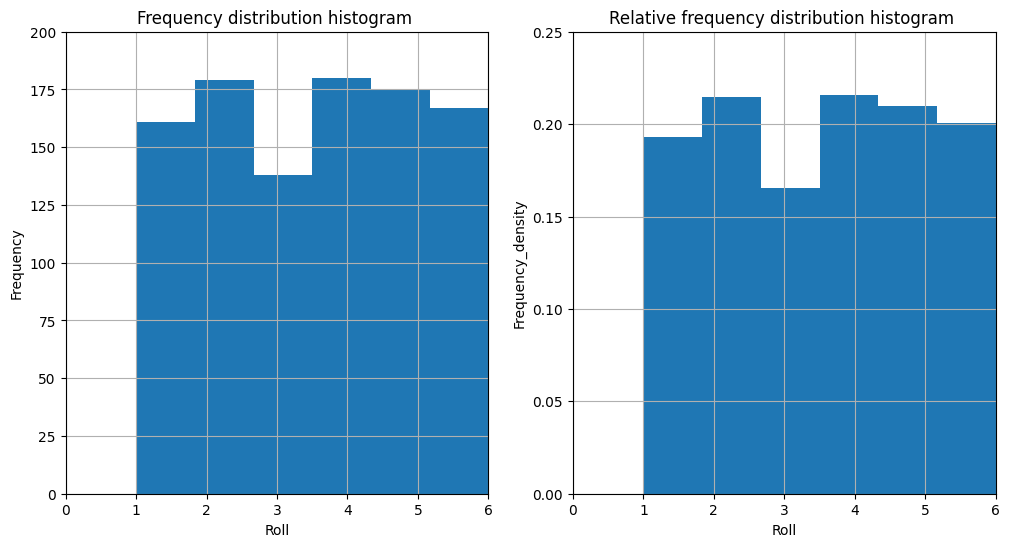

In [3]:
#Plotting the frequency distribution and relative frequency histogaram of 1000 times dice rolls
fig, (ax1, ax2)=plt.subplots(1 , 2 ,figsize=(12 , 6))
n, bins, patches=ax1.hist(rollings, bins=6)
ax1.set_xlabel('Roll')
ax1.set_xlim(0 , 6)
ax1.set_ylabel('Frequency')
ax1.set_ylim(0 , 200)
ax1.set_title("Frequency distribution histogram ")
ax1.grid(True)
n_, bins, patches=ax2.hist(rollings, bins=6, density=True)
ax2.set_xlabel('Roll')
ax2.set_xlim(0 , 6)
ax2.set_ylabel('Frequency_density')
ax2.set_ylim(0 , 0.25)
ax2.set_title("Relative frequency distribution histogram ")
ax2.grid(True)

In [4]:
#We generate random normal distribution of loc=0 and std=1
rand=np.random.normal(0, 1, size=1000)

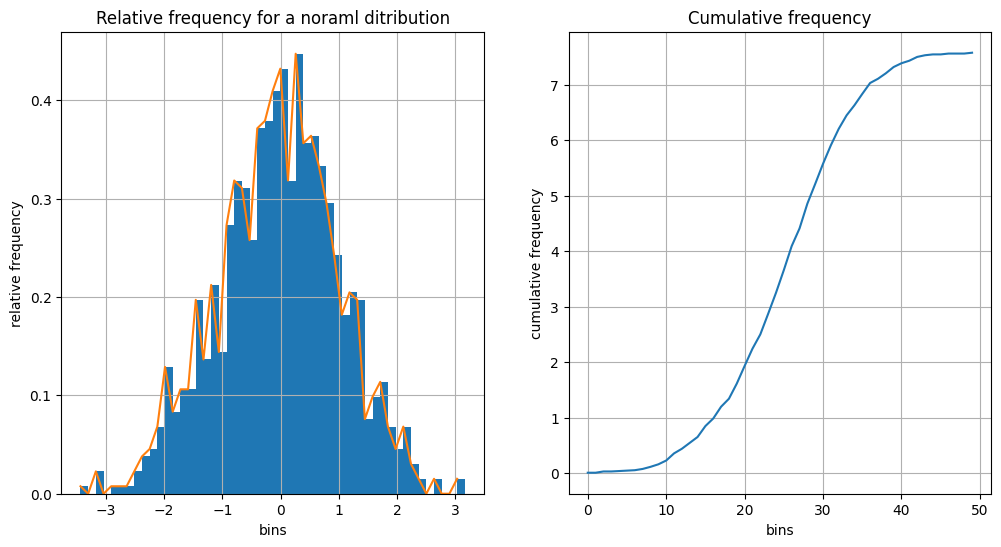

In [5]:
#Visualization of the random normal distribution
fig, (ax1, ax2) =plt.subplots(1 , 2 , figsize=(12 , 6 ))
n, bins, patches=ax1.hist(rand, bins=50, density=True)          #Display the histogram of relative frequency
ax1.set_xlabel('bins')
ax1.set_ylabel('relative frequency')
ax1.plot(bins[:50], n)                                          #Relative frequency in the form of plot rather than bars
ax1.set_title('Relative frequency for a noraml ditribution')
ax1.grid()
ax2.plot(np.cumsum(n))                                           #Frequency density
ax2.set_xlabel('bins')
ax2.set_ylabel('cumulative frequency')
ax2.set_title('Cumulative frequency')
ax2.grid()

# **02_Basic numeric descriptives**

# **Measure of location: arithmetic/geometric mean**

In [6]:
"""
Let us simulate a portfolio manager returns recorded between 2015 and 2020,
we will compare the growth rate using arithmetic mean and geometric mean
"""
growth_rate=np.array([np.arange(2015, 2021, 1), [.36, .23, -.48,- .3, .15, .31 ]])

In [7]:
#Arithmic mean
arithmetic_mean=np.mean(growth_rate[1])
geometric_mean=sp.stats.mstats.gmean(growth_rate[1]+1)-1  #We add one, so we convert returns to growth factors before computing, and then we substract one to go back to return
print(geometric_mean)

-0.014282599080668423


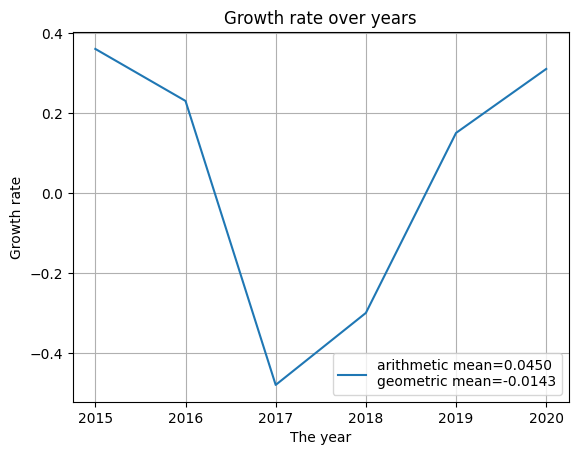

In [8]:
#Plot of the yearly growth rates
plt.plot(growth_rate[0] ,  growth_rate[1], label=f"arithmetic mean={arithmetic_mean:.4f}\ngeometric mean={geometric_mean:.4f}")
plt.xlabel('The year')
plt.ylabel('Growth rate')
plt.title("Growth rate over years")
plt.legend()
plt.grid(True)

In [9]:
#Let us assume we invested 100$:
#Using arithmic mean
gain1=100*(arithmetic_mean+1)**6
print(f"estimated gain using arithmic mean over 6 years is {gain1:.3f}")
#Using geometric mean
gain2=100*(geometric_mean+1)**6
print(f"estimated gain using geometric mean over 6 years is {gain2:.3f}")

estimated gain using arithmic mean over 6 years is 130.226
estimated gain using geometric mean over 6 years is 91.731


This is due to the compound effect, which means that each year growth  is not calculated from the initial principle, but from the total accumulated amount so far

# **Measure od variability**

In [10]:
#Measure of range
x=np.random.randn(50)
full_range=x.max()-x.min()
print(full_range)

3.871465403483414


In [11]:
#Percentile:
upper_percentile , lower_percentile=np.percentile(x,  [95 , 5])
print(upper_percentile, lower_percentile)

1.4817366293265866 -1.512106087346419


In [12]:
#Percentile range
percentile_range=upper_percentile-lower_percentile

**Example of use of range and percentile range**

In [13]:
"""
Assuming we measure temperature variations over a period of 100 days, the range (maximum minus minimum temperature)
captures the extreme temperature values during that period. This information is crucial for preparedness against any
unexpected or rare temperature events.
In contrast, the percentile range (for example, between the 5th and 95th percentiles) reflects the usual temperature
fluctuations experienced in the city, excluding rare extremes. This measure provides a clearer understanding of typical
temperature behavior in the region.
"""

'\nAssuming we measure temperature variations over a period of 100 days, the range (maximum minus minimum temperature)\ncaptures the extreme temperature values during that period. This information is crucial for preparedness against any\nunexpected or rare temperature events.\nIn contrast, the percentile range (for example, between the 5th and 95th percentiles) reflects the usual temperature\nfluctuations experienced in the city, excluding rare extremes. This measure provides a clearer understanding of typical\ntemperature behavior in the region.\n'

In [14]:
#Generating synthetic temperature recording over 100 days
specific_temperatures=np.array([-15 , -5 , -1, 0 , 2 , 35 , 42 , 41 , 43, 40])    #Assuming 10 days of sepecific (extreme) temperatures
usual_temperatures=np.linspace(15, 30, 90)                                        #Assuming 90 days of usual city temperature
T=np.concatenate((specific_temperatures, usual_temperatures))                     #Concatinating to get 100 days temperature

In [15]:
#Calculating the full range of temperature
full_range=T.max()-T.min()

In [16]:
#Calculating percentile range of temperature
upper_percentile, lower_percentile=np.percentile(T, [95 , 5])
percentile_range=upper_percentile-lower_percentile

In [17]:
print(f"The full range={full_range:.2f}\npercentile range={percentile_range:.2f}")

The full range=58.00
percentile range=15.90


In [18]:
#Variance of a population and sample:
"""
Population is the entire group we want to study, since sample is a samller group from the population when it is
hard to study the entire the population.
Let us assume that we know te studied parameter for all the population (for instance, adult heights in the world),
and let us say that the number of addults in the world is 1000, with the heights are modeled by a normal distribution
of loc=170, and scale=10"""
H=np.random.normal(loc=170, scale=10, size=10000)
#We calculate the variance of the population using np.var
pop_var=np.var(H)
print(pop_var)

100.30693921389124


In [19]:
#In case we can not measure the entire population heights, we choose a sample (of 100 for instance):
sample=np.random.choice(H, size=100)
sample_var=np.var(sample, ddof=0)
print(sample_var)

108.9105592099731


**Estimators for huge number of samples**

In this section , we will try estimating variance for 10000 samples, and then taking the mean of all these varinaces to see how powerful an unbiased estimator in statistics

In [23]:
#The power of estimators
variances=[]                                     #Create an empty list to store all the variances
for i in range(10000):
  samples=np.random.choice(sample, size=100)     #Choosing 10000 samples of size 100, and calculating the variance of each sample
  sample_variance=np.var(samples, ddof=1)        #variance of each sample, using unbiased estimator (var=sum(observation-sample_mean)/(n-1))
  variances.append(sample_variance)              #Storing the different variances in the list variances

In [24]:
#Taking the mean of the variances of all the samples
mean_value=np.mean(variances)

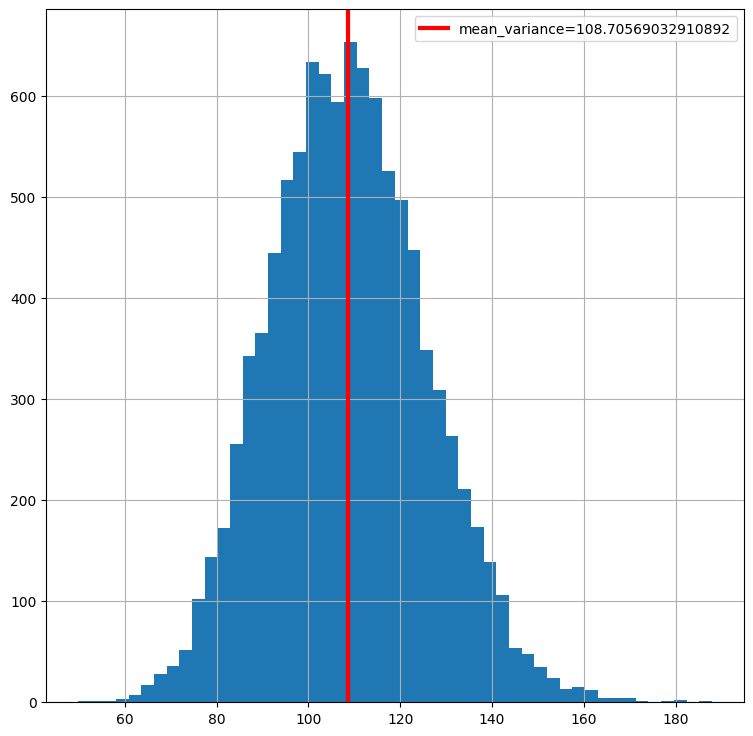

In [27]:
#plot of different varinces histogram
fig, ax=plt.subplots(figsize=(9 , 9))
n, bins, patches=ax.hist(variances, bins=50)
ax.grid()
ax.axvline(x=mean_value, lw=3, color='r', label=f"mean_variance={mean_value}")
ax.legend()

We see that the variance estimated by the unbiased estimator is very close to the variance of the population, even if we have few samples, we still able to estimate the variance with high accuracy